# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [307]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('../data/airbnb_NYC.csv', encoding='ISO-8859-1', low_memory=False)
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [308]:
#1
df['Price'] = df['Price'].replace(",", "", regex=True)
# I removed the commas so that values are easier to work with and interpreted correctly
df['Price_nan'] = df['Price'].isnull()
print('Before coercion: \n', df['Price'].describe(),'\n')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# I ensured every value was represented as a number (float) rather than an object
print('After coercion: \n', df['Price'].describe(),'\n')
print('Total Missings: \n', sum(df['Price_nan']),'\n')
#Finally, I ensured there were no missing values

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



In [309]:
df2 = pd.read_csv('../data/mn_police_use_of_force.csv', encoding='ISO-8859-1', low_memory=False)
df2.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [310]:
#2
df2['subject_injury_nan'] = df2['subject_injury'].isnull()
print('Total Missings: \n', sum(df2['subject_injury_nan']),'\n')

missing_prop = df2['subject_injury'].isna().mean()
print('Proportion Missing:' '\n', missing_prop, '\n')

ct = pd.crosstab(df2['force_type'], df2['subject_injury'], dropna=False)
print(ct)

df2['subject_injury'] = df2['subject_injury'].fillna("Missing")
df2.head()
# Bodily Force, Chemical Irritant, and Taser incidents have the most missing data.

Total Missings: 
 9848 

Proportion Missing:
 0.7619342359767892 

subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood,subject_injury_nan
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East,True
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West,True
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West,True
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,True
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,True


In [311]:
df3 = pd.read_csv('../data/metabric.csv', encoding='ISO-8859-1', low_memory=False)
df3.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [312]:
#3
df3['Survival_Dummy'] = (df3['Overall Survival Status'] == '0:LIVING').astype(int)
df3.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,Survival_Dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,0


In [313]:
#4
df['Review Scores Rating nan'] = df['Review Scores Rating'].isnull()
print('Total Missings: \n', sum(df['Review Scores Rating nan']),'\n')

impute_value = df['Review Scores Rating'].median()
df['Review Scores Rating impute'] = df['Review Scores Rating'].fillna(impute_value)
df.head()

#This may bias results because by forcing observations to the exact same value (the median), you shrink the standard deviation of your data.
#Additionally, in Airbnb data, missing reviews often mean the listing is brand new or badly managed. If bad listings don't get reviews, and we assign them as the median score, we are making those listings look much better than they actually are.

Total Missings: 
 8323 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_nan,Review Scores Rating nan,Review Scores Rating impute
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,False,True,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,False,True,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,False,True,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,False,True,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,False,False,96.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [314]:
!python3 -m pip install xlrd

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [318]:
#1
sharks = pd.read_excel('GSAF5.xls', engine='xlrd')
sharks.head()
# What works is pd.read_excel

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
#2
sharks = sharks.dropna(axis=1, thresh=10)
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

#3
An observation is one specific shark-human encounter. It is not just a row of text, but a snapshot of an event at a specific time and place.

An observation is justified by its unique combination of attributes—Date, Year, Type, Country, etc.

It affects cleaning because empty rows must be deleted (there is no attack to be observed), duplicates must be removed/combined, and missing values must be assessed (some missing values are more important than others; ex: date is more important than species).

It affects analysis because when you report the number of attacks (observations), you have to be certain of the exact number of rows and not include empty ones.

Pre cleaning information: 
 count    7071.000000
mean     1935.991515
std       270.689040
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

Total Missings: 
 2 

Post cleaning information: 
 count    7073.000000
mean     1936.005938
std       270.652121
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

Total Missings: 
 0 



Text(0.5, 0, 'Number of Attacks')

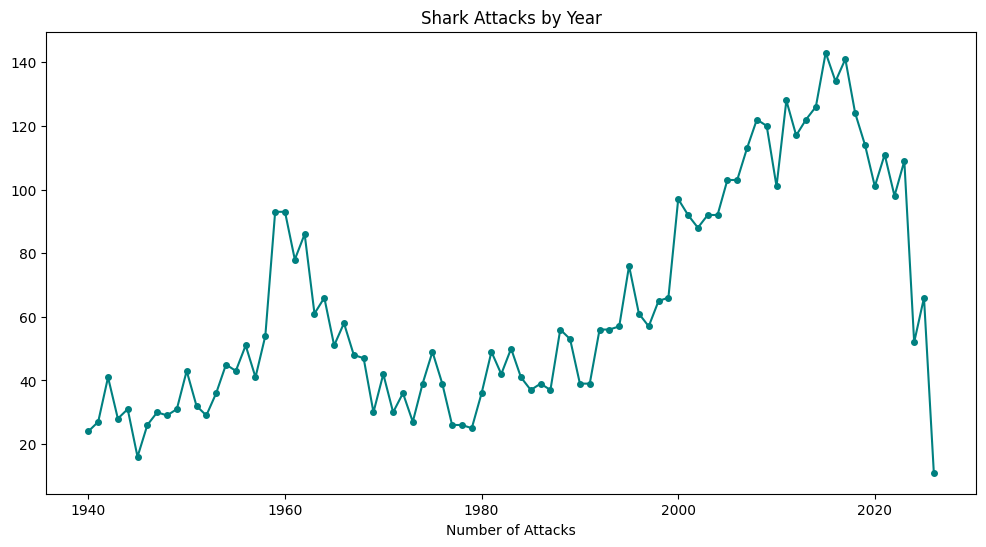

In [320]:
#4
print('Pre cleaning information: \n', sharks['Year'].describe(),'\n')
print('Total Missings: \n', sum(sharks['Year'].isnull()),'\n')
impute_shark = sharks['Year'].median()
sharks['Year'] = sharks['Year'].fillna(impute_shark)
print('Post cleaning information: \n', sharks['Year'].describe(),'\n')
print('Total Missings: \n', sum(sharks['Year'].isnull()),'\n')

#The range goes from 0 to 2026, which is peculiar because there likely are not records of shark attacks from the year 0.

modern_sharks = sharks[sharks['Year'] >= 1940]
import matplotlib.pyplot as plt
attacks_by_year = modern_sharks.groupby('Year').size()
plt.figure(figsize=(12, 6))
attacks_by_year.plot(kind='line', marker='o', color='teal', markersize=4)
plt.title("Shark Attacks by Year")
plt.xlabel("Number of Attacks")

#Shark attacks have been increasing since 1940

Pre cleaning information: 
 count     4079
unique     251
top         16
freq        92
Name: Age, dtype: int64 

Total Missings: 
 2994 

Post cleaning information: 
 count    7073.000000
mean       26.314859
std        11.127245
min         1.000000
25%        22.000000
50%        24.000000
75%        26.000000
max        87.000000
Name: Age, dtype: float64 



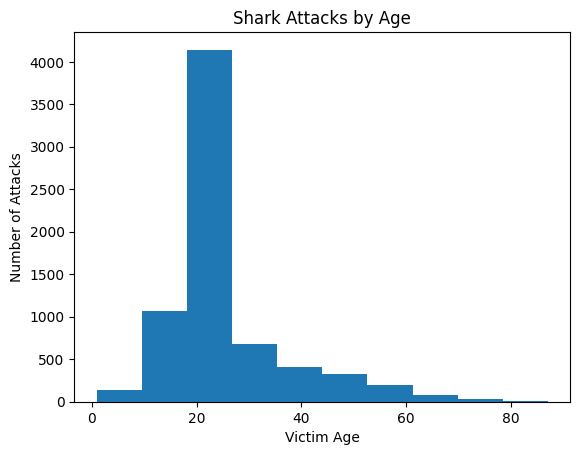

In [321]:
#5
print('Pre cleaning information: \n', sharks['Age'].describe(),'\n')
print('Total Missings: \n', sum(sharks['Age'].isnull()),'\n')
sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')
impute_victim = sharks['Age'].median()
sharks['Age'] = sharks['Age'].fillna(impute_victim)
print('Post cleaning information: \n', sharks['Age'].describe(),'\n')
plt.hist(sharks['Age'])
plt.xlabel("Victim Age")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Age")
plt.show()

In [322]:
#6
print('Pre cleaning information: \n', sharks['Type'].describe(),'\n')
print('Total Missings: \n', sum(sharks['Type'].isnull()),'\n')
def clean_type(t):
    if t == 'Provoked':
        return 'Provoked'
    elif t == 'Unprovoked':
        return 'Unprovoked'
    else:
        return 'Unknown'
sharks['Type'] = sharks['Type'].apply(clean_type)
sharks['Type'].unique()

proportions = sharks['Type'].value_counts(normalize=True)
unprovoked_prop = proportions.get('Unprovoked', 0)
print(f"Proportion of Unprovoked attacks: {unprovoked_prop:.2%}")

Pre cleaning information: 
 count           7055
unique            13
top       Unprovoked
freq            5224
Name: Type, dtype: object 

Total Missings: 
 18 

Proportion of Unprovoked attacks: 73.86%


In [323]:
#7
print('Pre cleaning information: \n', sharks['Fatal Y/N'].describe(),'\n')
print('Total Missings: \n', sum(sharks['Fatal Y/N'].isnull()),'\n')
def clean_fatal(t):
    if t == 'Y':
        return 'Y'
    elif t == 'N':
        return 'N'
    else:
        return 'Unknown'
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].apply(clean_fatal)
sharks['Fatal Y/N'].unique()

Pre cleaning information: 
 count     6512
unique      12
top          N
freq      4932
Name: Fatal Y/N, dtype: object 

Total Missings: 
 561 



array(['Y', 'N', 'Unknown'], dtype=object)

In [325]:
#8
ct = pd.crosstab(sharks['Type'], sharks['Fatal Y/N'])
fatality_rate = ct.div(ct.sum(axis=0), axis=1)
print(fatality_rate)

# The attack is more likely to be fatal when unprovoked because 85.15% of fatal attacks are unprovoked
# whereas only 1.34% provoked attacks are fatal.  
# I find this surprising as I would assume those who provoke a shark and fight back would be more fatally injured.

Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.123682  0.018377  0.013441
Unknown     0.091444  0.849923  0.135081
Unprovoked  0.784874  0.131700  0.851478


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about tidying data and its advantages. 
2. The "tidy data standard" is intended to make initial cleaning easier because you do not need to start from scratch each time you clean. It also helps facilitate exploration and analysis. 
3. Sentence 1 means that all tidy datasets are formatted similarly, like family, but messy datasets have no standards or rules keeping them similar at all. Sentence 2 means that it can be tricky to define variables and observations as they are easy to mix up. Variables and observations are actually quite different, as I will explain in question 4.
4. Values: usually either numbers or strings that belong to a variable and an observation. Variables: contain all values that measure the same underlying attribute across units (ex: height). Observations: contain all values measured in the same unit across attributes (ex: a person).
5. In section 2.3, tidy data is defines as a standard way of mapping the meaning of a dataset to its structure. In tidy data, every variable forms a column, every observation forms a row, and every type of observational unit forms a table. 
6. The 5 most common problems with messy datasets are:
   1. Column headers are values, not variable names
   2. Multiple variables are stored in one column
   3. Variables are stored in both rows and columns
   4. Multiple types of observational units are stored in the same table
   5. A single observational unit is stored in multiple tables
   The data in table 4 are messy because its column headers are values, not variable names. Melting is stacking a dataset by turning columns into rows. It is parameterised by a list of columns that are already variables. Other columns are converted into two variables.
7. Table 11 is messy because its columns represent values rather than variables. Table 12 is tidy or "molten" because each variable forms a column, each observation forms a row, and each type of observational unit forms a table. 

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [326]:
#1
gifts = pd.read_csv('../data/ForeignGifts_edu.csv', encoding='ISO-8859-1', low_memory=False)
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

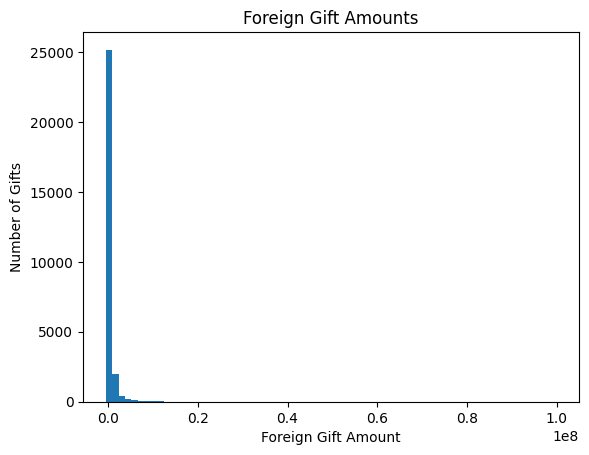

In [327]:
#2
plt.hist(gifts['Foreign Gift Amount'], bins=70)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Number of Gifts")
plt.title("Foreign Gift Amounts")
gifts['Foreign Gift Amount'].describe()
# Gifts range from 0 to 100000000, but most gifts are between 5700 and 376142.

count        28221
unique           3
top       Contract
freq         17274
Name: Gift Type, dtype: object
The proportion of monetary gifts is: 38.75128450444704%
The proportion of contract gifts is: 61.20973742957372%
The proportion of real estate gifts is: 0.038978065979235324%


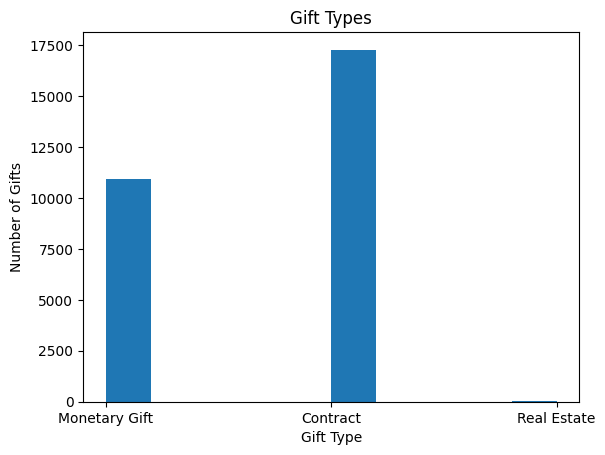

In [330]:
#3

plt.hist(gifts['Gift Type'])
plt.xlabel("Gift Type")
plt.ylabel("Number of Gifts")
plt.title("Gift Types")
print(gifts['Gift Type'].describe())

prop_mon = len(gifts[gifts['Gift Type'] == 'Monetary Gift'])/len(gifts)
prop_cont = len(gifts[gifts['Gift Type'] == 'Contract'])/len(gifts)
prop_re = len(gifts[gifts['Gift Type'] == 'Real Estate'])/len(gifts)
print(f"The proportion of monetary gifts is: {prop_mon*100}%")
print(f"The proportion of contract gifts is: {prop_cont*100}%")
print(f"The proportion of real estate gifts is: {prop_re*100}%")
# Most gifts are contracts.

In [331]:
#4
print("Top 15 countries by gift number:", "\n", gifts.groupby(['Country of Giftor']).count().sort_values('ID')['ID'].tail(n=15), "\n")

Top 15 countries by gift number: 
 Country of Giftor
TAIWAN              381
INDIA               434
KOREA               452
THE NETHERLANDS     512
QATAR               693
SOUTH KOREA         811
HONG KONG          1080
GERMANY            1394
FRANCE             1437
SAUDI ARABIA       1610
SWITZERLAND        1676
JAPAN              1896
CANADA             2344
CHINA              2461
ENGLAND            3655
Name: ID, dtype: int64 



In [279]:
print("Top 15 countries by amount given:", "\n", gifts.groupby(['Country of Giftor']).sum().sort_values('Foreign Gift Amount')['Foreign Gift Amount'].tail(n=15), "\n")

Top 15 countries by amount given: 
 Country of Giftor
AUSTRALIA                248409202
SINGAPORE                401157692
FRANCE                   405839396
UNITED ARAB EMIRATES     431396357
GERMANY                  442475605
INDIA                    539556490
SWITZERLAND              619899445
JAPAN                    655954776
HONG KONG                887402529
CANADA                   898160656
BERMUDA                  899593972
SAUDI ARABIA            1065205930
CHINA                   1237952112
ENGLAND                 1464906771
QATAR                   2706240869
Name: Foreign Gift Amount, dtype: int64 



Top 15 institutions by amount received: 
 Institution Name
Arizona State University                        400
University of Chicago (The)                     401
University of Colorado Denver                   436
Harvard University                              453
Yale University                                 550
Massachusetts Institute of Technology           582
University of Pennsylvania                      625
Cornell University                              653
Stanford University                             668
University of Michigan - Ann Arbor              715
Johns Hopkins University                        899
Ohio State University (The)                    1014
Columbia University in the City of New York    1127
California Institute of Technology             2502
University of California, Los Angeles          3916
Name: ID, dtype: int64 



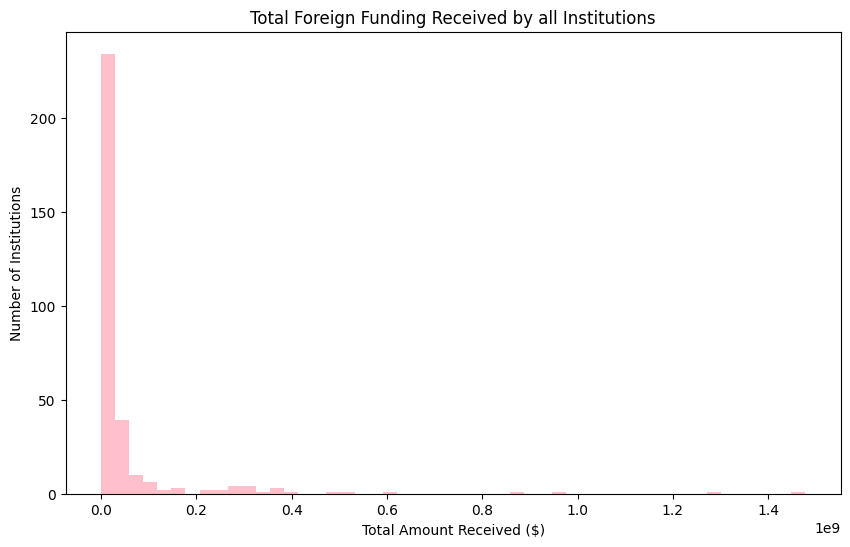

In [333]:
#5
print("Top 15 institutions by amount received:", "\n", gifts.groupby(['Institution Name']).count().sort_values('ID')['ID'].tail(n=15), "\n")
inst_totals = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(inst_totals, bins=50, color='pink')
plt.title('Total Foreign Funding Received by all Institutions')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.show()

In [334]:
#6
print("Top 15 giftors by total given:", "\n", gifts.groupby(['Giftor Name']).sum().sort_values('Foreign Gift Amount')['Foreign Gift Amount'].tail(n=15), "\n")

Top 15 giftors by total given: 
 Giftor Name
Royal Embassy of Saudi Arabia            67062486
CMKL University                          67700000
Contracting Party                        69996984
Government of Saudi Arabia               75192434
Qatar National Research Fund             79021705
Anonymous #9                             96334996
QIC                                     148355497
Emirates Institute for Advanced Sc      170641244
Church of Jesus Christ of LDS           185203715
HCL                                     190000000
Saudi Arabian Cultural Mission          275221475
Anonymous                               338793629
Qatar Foundation for Education          373945215
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation                       1166503744
Name: Foreign Gift Amount, dtype: int64 



**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [335]:
#1
college = pd.read_csv('../data/college_completion.csv', encoding='ISO-8859-1', low_memory=False)

In [336]:
#2
print(college.shape)
college.head()
# There are 63 variables and 3798 observations

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [337]:
#3
ct = pd.crosstab(college['control'], college['level'])
print(ct)
# Most observations are private, not-for-profit, 4 year institutions.
# The next most are public 2-year institutions.
# The least observations belong to the 2-year private not-for-profit category.
# Most private for-profit colleges are 4-year.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


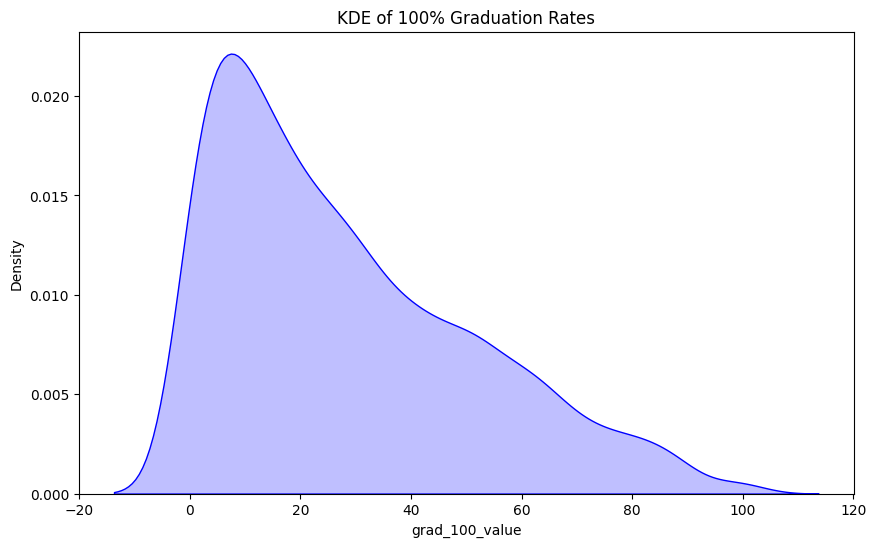

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


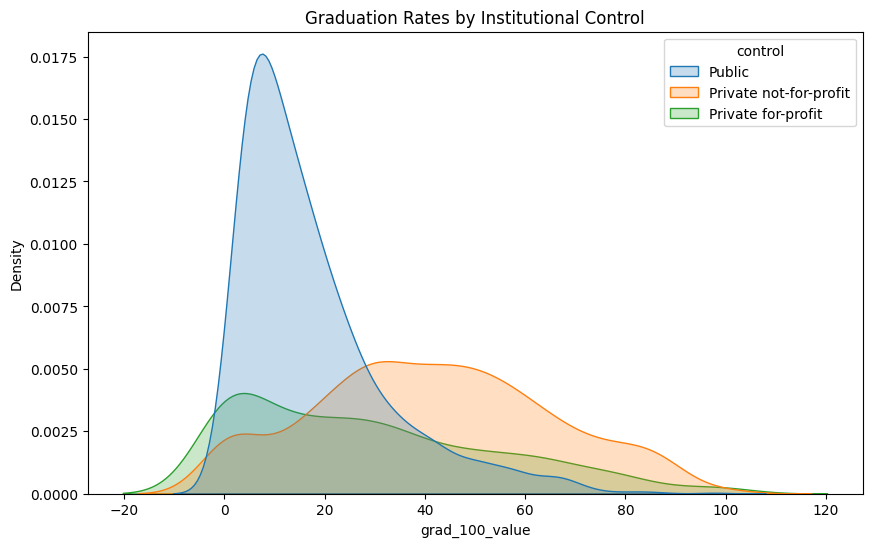

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [339]:
#4
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(college['grad_100_value'], fill=True, color="blue")
plt.title('KDE of 100% Graduation Rates')
plt.show()
grad_desc = college['grad_100_value'].describe()
print(grad_desc)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=college, x='grad_100_value', hue='control', fill=True)
plt.title('Graduation Rates by Institutional Control')
plt.show()

grad_desc_cont = college.groupby('control')['grad_100_value'].describe()
print(grad_desc_cont)

#Private not-for-profit institutions appear to have the most favorable graduation rates.

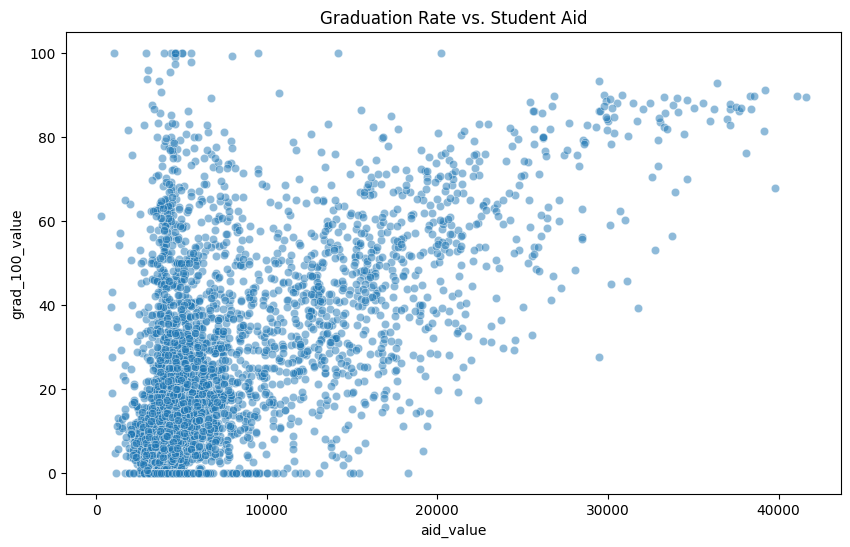

Overall Covariance: 88610.48316902411
Overall Correlation: 0.5758792845936078


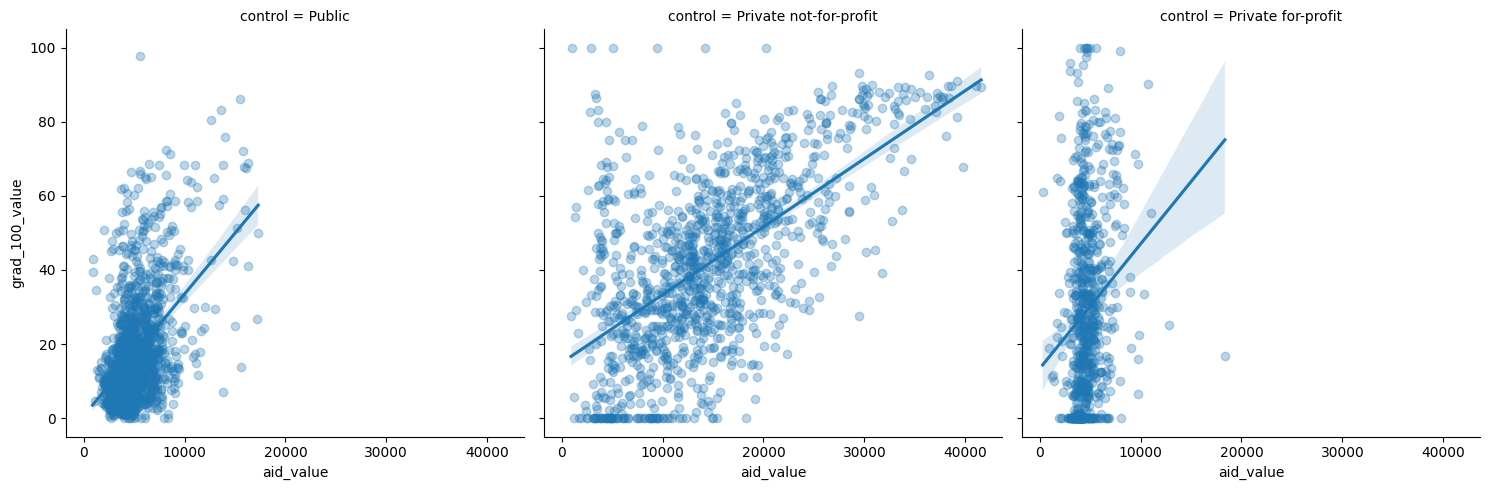

Correlation for Private for-profit: 0.188
Correlation for Private not-for-profit: 0.602
Correlation for Public: 0.482
Covariance for Private for-profit: 6897.525
Covariance for Private not-for-profit: 109274.123
Covariance for Public: 15355.146


In [341]:
#5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', alpha=0.5)
plt.title('Graduation Rate vs. Student Aid')
plt.show()

print("Overall Covariance:", college[['grad_100_value', 'aid_value']].cov().iloc[0,1])
print("Overall Correlation:", college['grad_100_value'].corr(college['aid_value']))

#As aid increases, graduation rate appears to increase, but it's not an immediately obvious increase.

sns.lmplot(data=college, x='aid_value', y='grad_100_value', col='control', scatter_kws={'alpha':0.3})
plt.show()

for name, group in college.groupby('control'):
    corr = group['grad_100_value'].corr(group['aid_value'])
    print(f"Correlation for {name}: {corr:.3f}")
for name, group in college.groupby('control'):
    cov = group['grad_100_value'].cov(group['aid_value'])
    print(f"Covariance for {name}: {cov:.3f}")

# The three components of the overall scatterplot make up different sections and are each very different from one another. 
# Aid seems to be very positively related to graduation rate for private not-for-profit institutions.
# Public and Private for-profit institutions seem to have less correlation, with public having higher correlation than private for-profit institutions.


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

#6
1. $$m(a + bX) = \frac{1}{N} \sum_{i=1}^N (a + b x_i)$$
Distribute the summation:
$$= \frac{1}{N} \left( \sum_{i=1}^N a + \sum_{i=1}^N b x_i \right)$$
Since $a$ is a constant, $\sum_{i=1}^N a = Na$. 
Since $b$ is a constant, we can pull it out of the sum:
$$= \frac{1}{N} (Na + b \sum x_i) = \frac{Na}{N} + b \frac{\sum x_i}{N} = a + b \cdot m(X)$$

2. $$\text{cov}(X,X) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)).$$
$$
\text{cov}(X,X) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
Recall the definition of the sample variance of $X$ is,
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
so, 
$$
\text{cov}(X,X) = s^2
$$

3. $$\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y)).$$
$$\text{cov}(X,a+bY) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(a + by_i - m(a +bY)).$$
Recall from question 1: $m(a + bX) = a+b \times m(X)$
So, 
$$\text{cov}(X,a+bY) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))((a + by_i) - (a+b \times m(Y))) =  \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(by_i - b \times m(Y)). $$
We can factor out the $b$ to get:
$$\text{cov}(X,a+bY) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))b(y_i - \times m(Y)) = b\dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - \times m(Y)) = b \times \text{cov}(X,Y).$$

4. $$\text{cov}(a+bX,a+bY) =  \dfrac{1}{N} \sum_{i=1}^N ((a + bx_i) - m(a + bX))((a + by_i) - m(a + bY)).$$
Recall from question 1: $m(a + bX) = a+b \times m(X)$
So,
$$\text{cov}(a+bX,a+bY) =  \dfrac{1}{N} \sum_{i=1}^N ((a + bx_i) - (a+b \times m(X)))((a + by_i) - (a+b \times m(Y))) = \dfrac{1}{N} \sum_{i=1}^N (bx_i - b \times m(X))(by_i - b \times m(Y)).$$
We can factor out the $b$'s to get:
$$\text{cov}(a+bX,a+bY) = \dfrac{1}{N} \sum_{i=1}^N b(x_i - \times m(X))b(y_i - \times m(Y)) = b^2\dfrac{1}{N} \sum_{i=1}^N (x_i - \times m(X))(y_i - \times m(Y)) = b^2\text{cov}(X,Y).$$

5. 
Median: Yes, it is true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$. The median is a "positional" statistic. If you multiply every value by $b$ (where $b>0$) and add $a$, the relative order of the points does not change. The value at the 50th percentile will be transformed by that same linear formula: 
$\text{med}(a+bX) = a + b \cdot \text{med}(X)$.

IQR: No, the IQR of $a + bX$ is not equal to $a + b \times \text{IQR}(X)$. The IQR is a measure of distance ($Q3 - Q1$).
$\text{IQR}(a+bX) = (a + bQ_3) - (a + bQ_1) = b(Q_3 - Q_1) = b \cdot \text{IQR}(X)$.
The constant $a$ disappears because it shifts both quartiles by the same amount, so the distance between them remains the same.

6. Using the example of $X = \{1, 9\}$:
$m(X) = (1+9)/2 = 5$.

Case 1: $X^2$ 
Transform the values: $1^2 = 1$ and $9^2 = 81$.
$m(X^2) = (1+81)/2 = 41$.
$(m(X))^2 = 5^2 = 25$.
$41 \neq 25$.

Case 2: $\sqrt{X}$
Transform the values: $\sqrt{1} = 1$ and $\sqrt{9} = 3$.
$m(\sqrt{X}) = (1+3)/2 = 2$.
$\sqrt{m(X)} = \sqrt{5} \approx 2.23$.
$2 \neq 2.23$.

So, the results we derived above  depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [342]:
#1
ames = pd.read_csv('../data/ames_prices.csv', encoding='ISO-8859-1', low_memory=False)
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


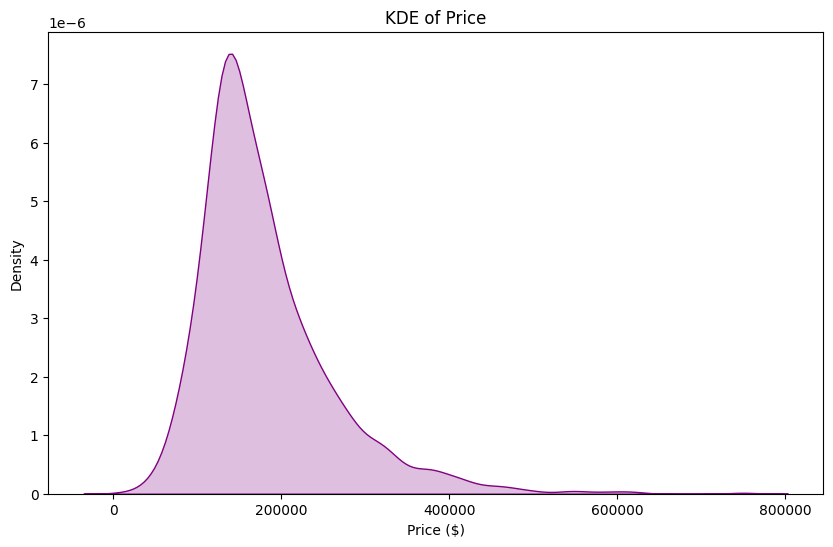

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


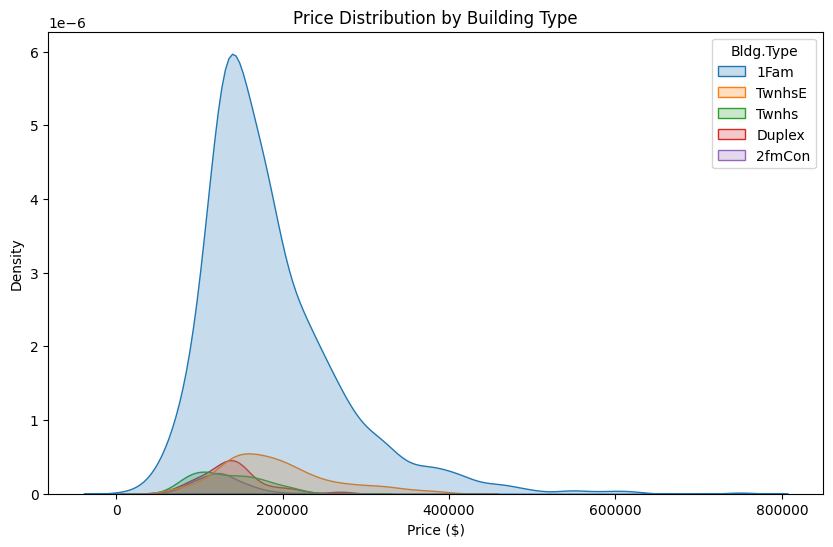

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [344]:
#2
plt.figure(figsize=(10, 6))
sns.kdeplot(ames['price'], fill=True, color="purple")
plt.title('KDE of Price')
plt.xlabel('Price ($)')
plt.show()

price_desc = ames['price'].describe()
print(price_desc)

plt.figure(figsize=(10, 6))
sns.kdeplot(data = ames, x = 'price', hue='Bldg.Type', fill=True)
plt.title('Price Distribution by Building Type')
plt.xlabel('Price ($)')
plt.show()

building_desc = ames.groupby('Bldg.Type')['price'].describe()
print(building_desc)

# 1 Family buildings are the most expensive, on average.
# 1 Family buildings and TwnhsE have the most variance in transaction prices. 

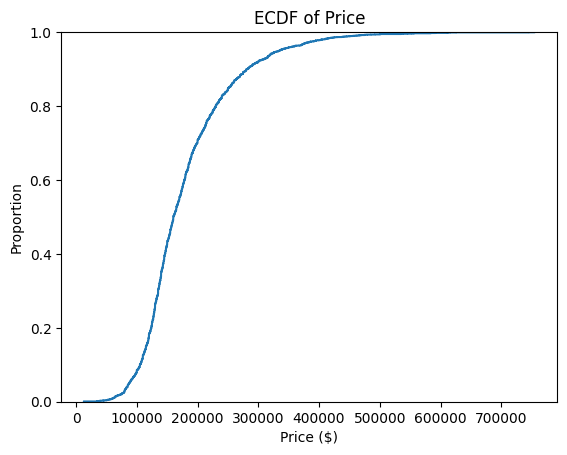

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [345]:
#3
sns.ecdfplot(data = ames, x = 'price')
plt.title('ECDF of Price')
plt.xlabel('Price ($)')
plt.show()
ames['price'].describe()


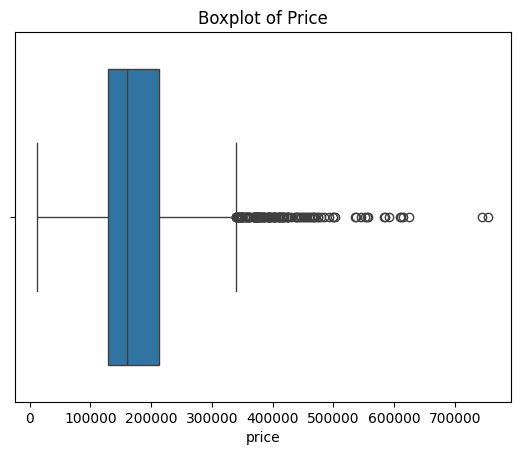

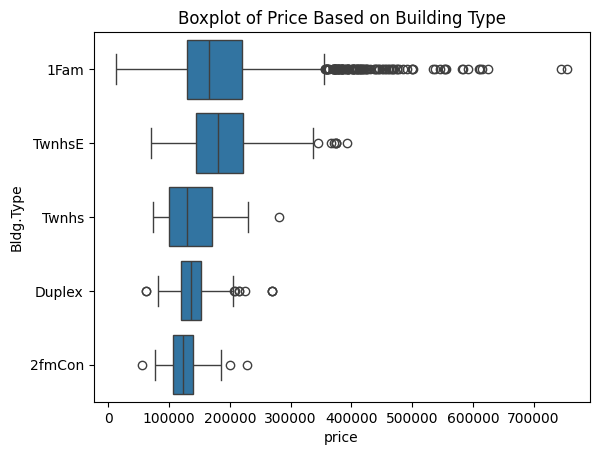

In [346]:
#4
sns.boxplot(data = ames, x = 'price')
plt.title('Boxplot of Price')
plt.show()
# There are many outliers

sns.boxplot(data = ames, x = 'price', y = 'Bldg.Type')
plt.title('Boxplot of Price Based on Building Type')
plt.show()
# 1 family homes have the most outliers
# 1 family homes and townhouses have similar, large IQRs whereas duplexes and two-family conversions have much smaller IQRs.

In [347]:
#5
Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ames['is_outlier'] = ((ames['price'] < lower_bound) | (ames['price'] > upper_bound)).astype(int)

print(f"Total outliers detected: {ames['is_outlier'].sum()}")
ames.head()

Total outliers detected: 137


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,is_outlier
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,0
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,0
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


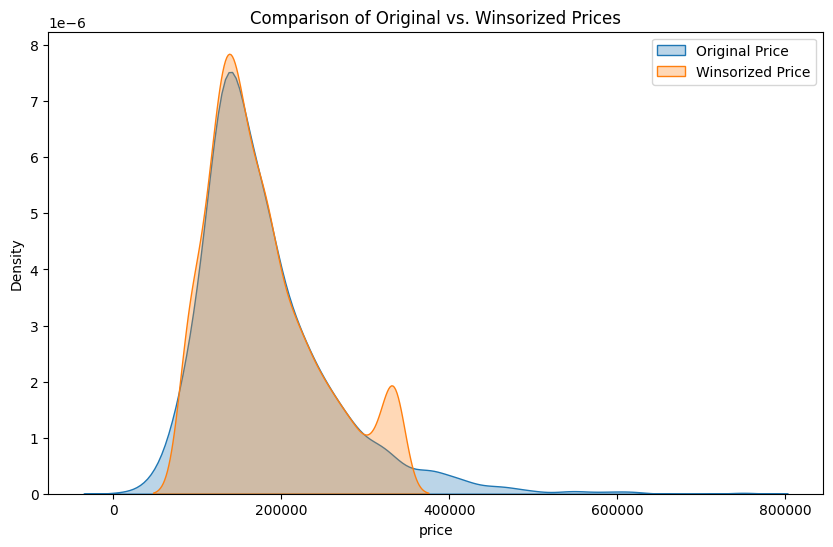

               price   price_winsor
count    2930.000000    2930.000000
mean   180796.060068  177632.528669
std     79886.692357   66195.453960
min     12789.000000   87500.000000
25%    129500.000000  129500.000000
50%    160000.000000  160000.000000
75%    213500.000000  213500.000000
max    755000.000000  335000.000000


In [348]:
#6
!python3 -m pip install scipy
from scipy.stats.mstats import winsorize
ames['price_winsor'] = winsorize(ames['price'], limits=[0.05, 0.05])

plt.figure(figsize=(10, 6))
sns.kdeplot(ames['price'], label='Original Price', fill=True, alpha=0.3)
sns.kdeplot(ames['price_winsor'], label='Winsorized Price', fill=True, alpha=0.3)
plt.title('Comparison of Original vs. Winsorized Prices')
plt.legend()
plt.show()

print(ames[['price', 'price_winsor']].describe())

# There is a lot less variation in the winsorized price. 
# The max price is much lower
# The min price is much higher